This project is still in development.

> ## Introduction


-A Generic Machine Learning Research On Star Craft II.
-At the end of the research, expected outcome will be a conclusion of different approaches in league prediction.

## Required Packages


In [1]:
import numpy as np
import pandas as pd
##################################################
###################Classsifiers###################
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
###################################################
################Processing and EDA#################
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score,f1_score, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
##################################################
##############Disable Warnings####################
import warnings  
warnings.filterwarnings('ignore')
##################################################
import os

**Brief information about columns for making easy to work with**


GameID: Unique ID for each game

LeagueIndex: 1-8 for Bronze, Silver, Gold, Diamond, Master, GrandMaster, Professional leagues

Age: Age of each player

HoursPerWeek: Hours spent playing per week

TotalHours: Total hours spent playing

APM: Action per minute

SelectByHotkeys: Number of unit selections made using hotkeys per timestamp

AssignToHotkeys: Number of units assigned to hotkeys per timestamp

UniqueHotkeys: Number of unique hotkeys used per timestamp

MinimapAttacks: Number of attack actions on minimal per timestamp

MinimapRightClicks: Number of right-clicks on minimal per timestamp

NumberOfPACs: Number of PACs per timestamp

GapBetweenPACs: Mean duration between PACs (milliseconds)

ActionLatency: Mean latency from the onset of PACs to their first action (milliseconds)

ActionsInPAC: Mean number of actions within each PAC

TotalMapExplored: Number of 24x24 game coordinate grids viewed by player per timestamp

WorkersMade: Number of SCVs, drones, probes trained per timestamp

UniqueUnitsMade: Unique units made per timestamp

ComplexUnitsMade: Number of ghosts, investors, and high templars trained per timestamp

ComplexAbilityUsed: Abilities requiring specific targeting instructions used per timestamp

MaxTimeStamp: Time stamp of game's last recorded event

In [2]:
#Total playing time is not chosen due to a player can give a long break to 
#his/her playing career, then they can start playing again
relatedColumnsList=["LeagueIndex","Age","HoursPerWeek","APM","SelectByHotkeys",
                    "AssignToHotkeys","UniqueHotkeys",
                    "MinimapAttacks","MinimapRightClicks","NumberOfPACs",
                    "GapBetweenPACs","ActionLatency",
                    "ActionsInPAC","TotalMapExplored","WorkersMade","UniqueUnitsMade",
                    "ComplexUnitsMade","ComplexAbilityUsed","MaxTimeStamp"]
df=pd.read_csv('../input/starcraft.csv')
df = df[relatedColumnsList]
df.dropna()
df = df[df['LeagueIndex']!=8]
df.head(n=6)

,LeagueIndex,Age,HoursPerWeek,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,5,27.0,10.0,143.7180,0.003515,0.000220,0.000055,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,0.000220,0.001397,0.000047,0.0,0.000000,127448
1,5,23.0,10.0,129.2322,0.003304,0.000259,0.000069,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,0.000381,0.001194,0.000087,0.0,0.000208,57812
2,4,30.0,10.0,69.9612,0.001101,0.000336,0.000042,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,0.000231,0.000745,0.000063,0.0,0.000189,95360
3,3,19.0,20.0,107.6016,0.001034,0.000213,0.000011,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,0.000202,0.000426,0.000075,0.0,0.000384,93852
4,3,32.0,10.0,122.8908,0.001136,0.000327,0.000039,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,0.000289,0.001174,0.000077,0.0,0.000019,51936
5,2,27.0,6.0,44.4570,0.000978,0.000255,0.000021,0.000000,0.000000,0.002425,76.4405,98.7719,3.0965,0.000170,0.000372,0.000064,0.0,0.000000,94032


In [3]:
leagueOne=df[df['LeagueIndex']==1]['Age']
leagueTwo=df[df['LeagueIndex']==2]['Age']
leagueThree=df[df['LeagueIndex']==3]['Age']
leagueFour=df[df['LeagueIndex']==4]['Age']
leagueFive=df[df['LeagueIndex']==5]['Age']
leagueSix=df[df['LeagueIndex']==6]['Age']
leagueSeven=df[df['LeagueIndex']==7]['Age']

In [4]:
print("Percentages of leagues in total data:\n")
df['LeagueIndex'].value_counts(normalize=True)*100

Percentages of leagues in total data:



4    24.281437
5    24.131737
6    18.592814
3    16.556886
2    10.389222
1     5.000000
7     1.047904
Name: LeagueIndex, dtype: float64

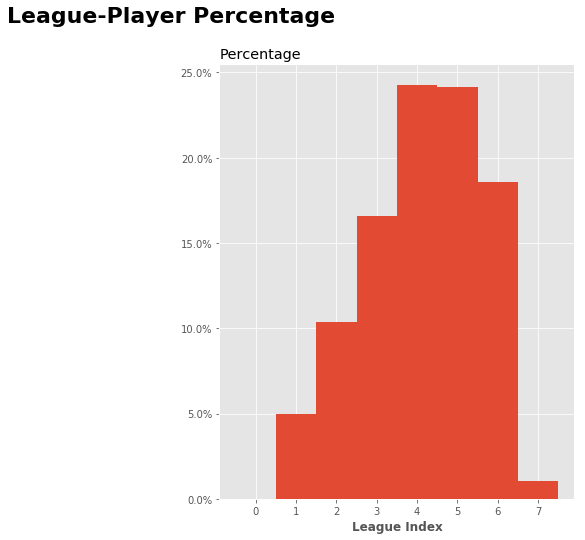

In [5]:
plt.style.use('ggplot')
fig, ax = plt.subplots(1, figsize = (14,8))
fig.suptitle('League-Player Percentage', fontweight='bold', fontsize = 22,ha='center')
bins = np.arange(0, 9, 1)
weights = np.ones_like(df['LeagueIndex']) / len(df['LeagueIndex'])
p2 = plt.subplot(1,2,2)
p2.hist(df['LeagueIndex'], bins=bins, weights = weights, align='left')
plt.xlabel('League Index', fontweight='bold')
plt.title('Percentage',loc='left')
yvals = plt.subplot(1,2,2).get_yticks()
plt.subplot(1,2,2).set_yticklabels(['{:3.1f}%'.format(y*100) for y in yvals])
plt.show()

In [6]:
leagues=[leagueOne,leagueTwo,leagueThree,leagueFour,
         leagueFive,leagueSix,leagueSeven]
newLabels=["Bronze", "Silver", "Gold", "Platinum",
           "Diamond", "Master", "Grandmaster"]

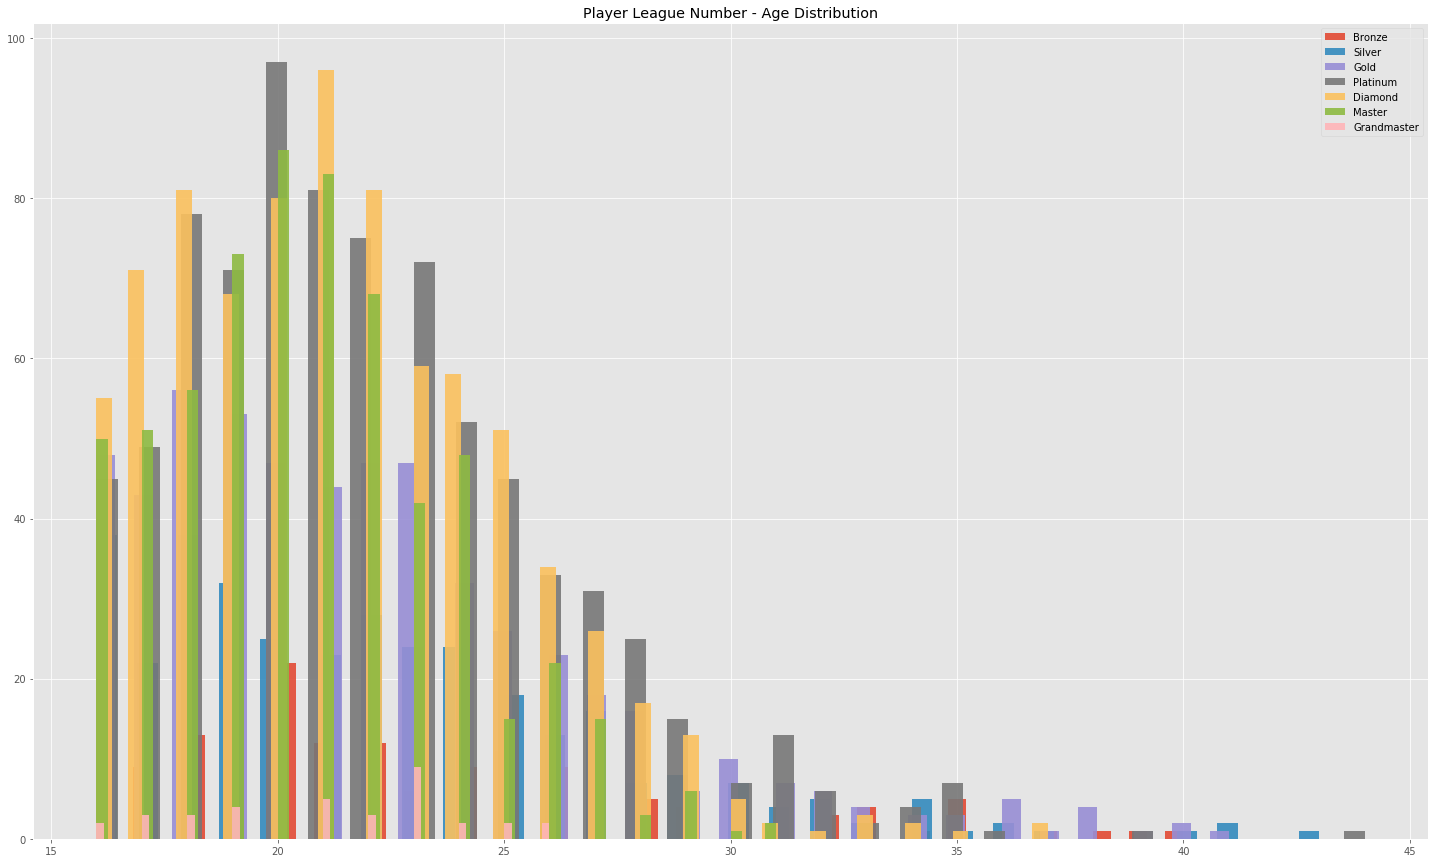

In [7]:
fig=plt.figure(figsize=(25,15))
plt.title("Player League Number - Age Distribution")
for i in range(len(leagues)):
    leagues[i].hist(alpha=0.9,bins=60,label=newLabels[i])
    plt.legend(loc="best")

In [8]:
leagueOne=df[df['LeagueIndex']==1]['APM']
leagueTwo=df[df['LeagueIndex']==2]['APM']
leagueThree=df[df['LeagueIndex']==3]['APM']
leagueFour=df[df['LeagueIndex']==4]['APM']
leagueFive=df[df['LeagueIndex']==5]['APM']
leagueSix=df[df['LeagueIndex']==6]['APM']
leagueSeven=df[df['LeagueIndex']==7]['APM']

In [9]:
leagues=[leagueOne,leagueTwo,leagueThree,leagueFour,
         leagueFive,leagueSix,leagueSeven]

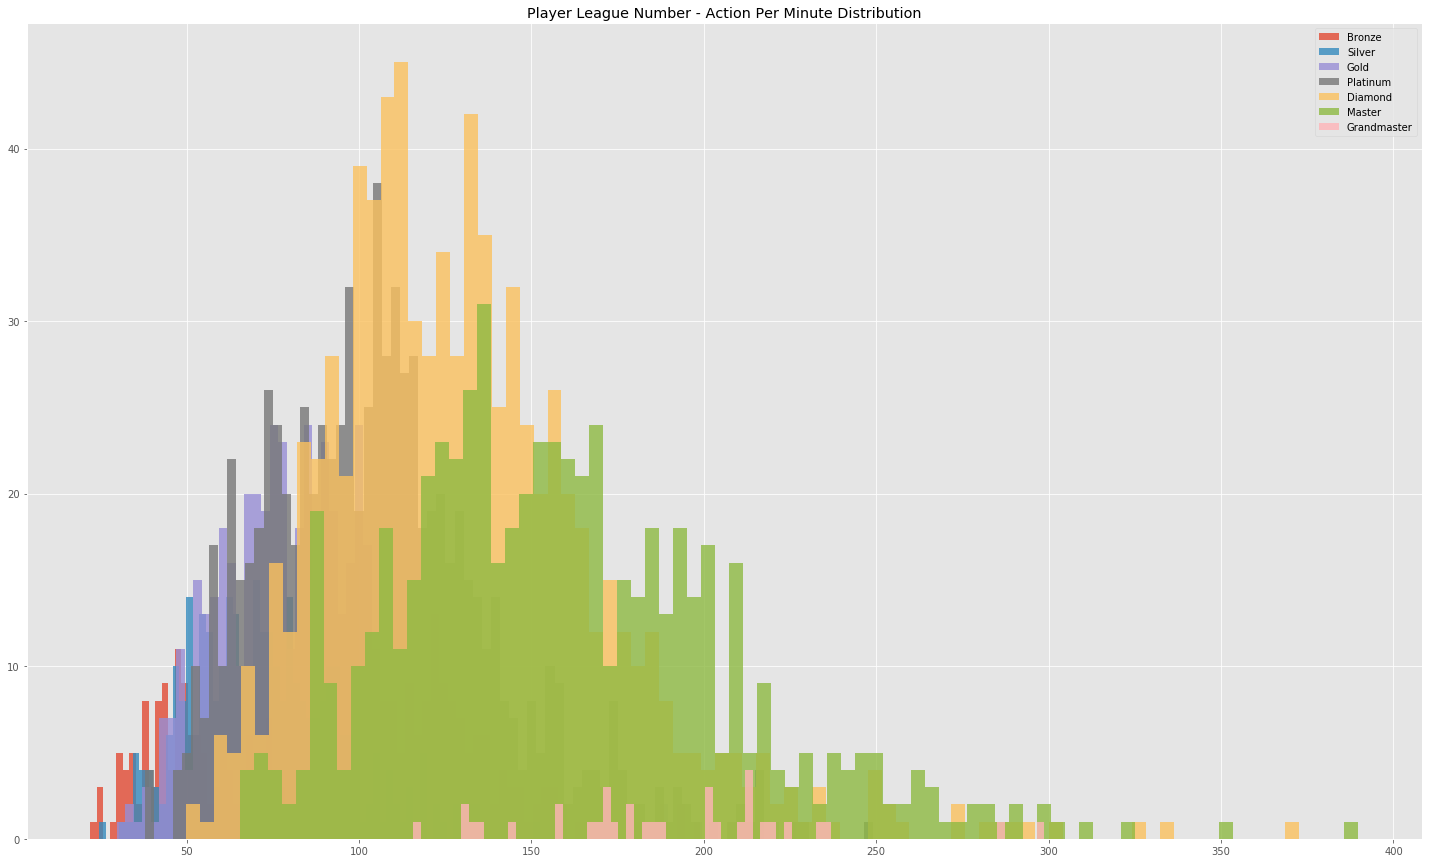

In [10]:
fig=plt.figure(figsize=(25,15))
plt.title("Player League Number - Action Per Minute Distribution")
for i in range(len(leagues)):
    leagues[i].hist(alpha=0.8,bins=80,label=newLabels[i])
    plt.legend(loc="best")

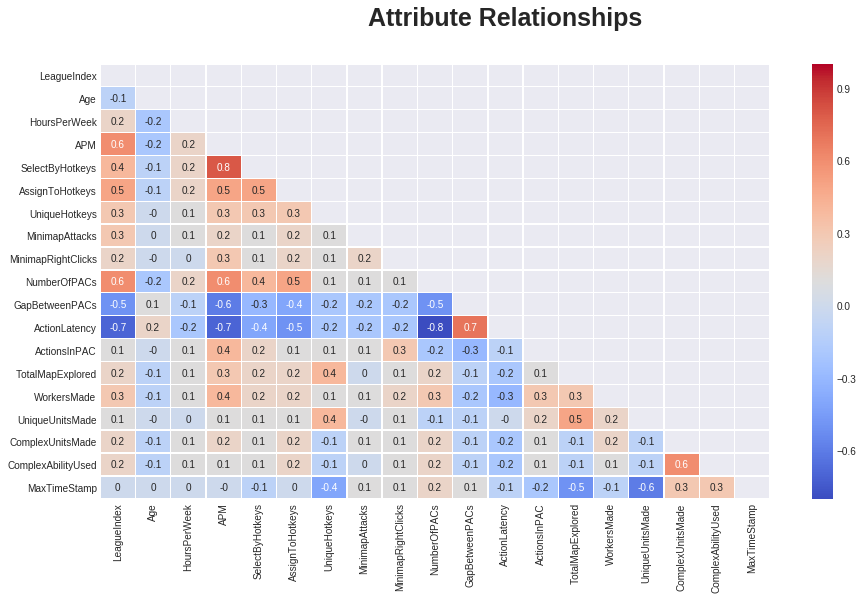

In [11]:
plt.style.use(['seaborn-dark'])
fig, axes = plt.subplots(nrows=1, ncols = 1, figsize = (15,8))
fig.suptitle('Attribute Relationships', fontsize=25, fontweight='bold')
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
r_matrix = df.corr().round(decimals=1)
sns.heatmap(r_matrix, mask=mask, annot=True, fmt='g',
            annot_kws={'size':10},linewidths=.3,cmap='coolwarm')
plt.show()


In [12]:
willBeFocusedColumns = ['APM','SelectByHotkeys', 'AssignToHotkeys',
                        'NumberOfPACs','GapBetweenPACs', 'ActionLatency']

In [13]:
ySelected = df['LeagueIndex']
xSelected = df[willBeFocusedColumns]

In [14]:
xTrain,xTest,yTrain,yTest=train_test_split(xSelected,ySelected,test_size=0.33)

In [15]:
dtc= DecisionTreeClassifier()
dtc.fit(xTrain,yTrain)
yPrediction=dtc.predict(xTest)
print("Decision Tree Confusion Matrix")
cm=confusion_matrix(yTest,yPrediction)
print(cm)
print("Score of Decision Tree: ",dtc.score(xTest,yTest),"\n")

Decision Tree Confusion Matrix
[[17 15 15  7  3  0  0]
 [14 27 29 32  9  2  0]
 [ 8 31 46 45 28  9  0]
 [ 9 20 67 73 63 25  0]
 [ 2 12 32 79 87 75  0]
 [ 0  5 12 35 63 83 15]
 [ 0  0  0  0  2  6  1]]
Score of Decision Tree:  0.3028105167724388 



In [16]:
#import graphviz 
#from sklearn import tree
#dot_data = tree.export_graphviz(dtc, out_file=None) 
#graph = graphviz.Source(dot_data) 
#graph.render("df") 
#graph

In [17]:
gnb=GaussianNB()
gnb.fit(xTrain,yTrain)
yPrediction=gnb.predict(xTest)
print("Naive Bayes Confusion Matrix")
cm=confusion_matrix(yTest,yPrediction)
print(cm)
print("Score of Naive Bayes: ",gnb.score(xTest,yTest),"\n")

Naive Bayes Confusion Matrix
[[ 26  18   6   6   0   1   0]
 [ 17  29  33  30   3   1   0]
 [  5  37  49  53  19   4   0]
 [  1  36  38 113  51  17   1]
 [  0   4  17  93  97  75   1]
 [  0   0   5  32  58  97  21]
 [  0   0   0   0   1   6   2]]
Score of Naive Bayes:  0.3744333635539438 



In [18]:
svmTrial = svm.LinearSVC()
svmTrial = svmTrial.fit(xTrain,yTrain)
yPrediction = svmTrial.predict(xTest)
print("Support Vector Machine Confusion Matrix")
cm=confusion_matrix(yTest,yPrediction)
print(cm)
print("Score of Support Vector Machine: ",svmTrial.score(xTest,yTest),"\n")

Support Vector Machine Confusion Matrix
[[ 57   0   0   0   0   0   0]
 [113   0   0   0   0   0   0]
 [167   0   0   0   0   0   0]
 [257   0   0   0   0   0   0]
 [286   0   0   0   0   1   0]
 [211   0   0   0   0   2   0]
 [  9   0   0   0   0   0   0]]
Score of Support Vector Machine:  0.05349048050770626 



In [19]:
rfc=RandomForestClassifier()
rfc.fit(xTrain,yTrain)
yPrediction=rfc.predict(xTest)
print("Random Forest Confusion Matrix")
cm=confusion_matrix(yTest,yPrediction)
print(cm)
print("Score of Random Forest: ",rfc.score(xTest,yTest),"\n")

Random Forest Confusion Matrix
[[ 16  21   9   9   1   1   0]
 [ 13  33  33  23  10   1   0]
 [  6  34  41  57  21   8   0]
 [  2  30  39 102  63  21   0]
 [  0   2  29  92  83  81   0]
 [  1   1  13  33  65  98   2]
 [  0   0   0   1   1   7   0]]
Score of Random Forest:  0.3381686310063463 



###########################################################################
######################## ONE VERSUS ALL CLASSIFICATION ####################
###########################################################################

In [20]:
def CalculateOneVsAll(targetRank):
    oneVsAllDataFrame = df.copy(deep=True)
    leagueIndexes=[1,2,3,4,5,6,7]
    if targetRank in leagueIndexes:
        leagueIndexes[targetRank-1]=0
    for i in range(len(oneVsAllDataFrame.index)):  
        if(oneVsAllDataFrame['LeagueIndex'][i]!=targetRank):
            for k in range(len(leagueIndexes)):
                oneVsAllDataFrame['LeagueIndex'].replace(leagueIndexes[k],0,inplace=True)
    
    OVAWillBeFocusedColumns = ['APM','SelectByHotkeys', 'AssignToHotkeys',
                            'NumberOfPACs','GapBetweenPACs', 'ActionLatency']
    yOVASelected = oneVsAllDataFrame['LeagueIndex']
    xOVASelected = oneVsAllDataFrame[OVAWillBeFocusedColumns]        
            
    xOVATrain,xOVATest,yOVATrain,yOVATest=train_test_split(xOVASelected,
                                                           yOVASelected,
                                                           test_size=0.33)  

    ######################DecisionTreeClassifier One vs All####################
    dtcOVA=DecisionTreeClassifier()
    dtcOVA.fit(xOVATrain,yOVATrain)
    yOVAPrediction=dtcOVA.predict(xOVATest)
    print("One Versus All Decision Tree Confusion Matrix")
    cmOVA=confusion_matrix(yOVATest,yOVAPrediction)
    print(cmOVA)
    print(yOVAPrediction)
    print("OVA Score of Decision Tree: ",dtcOVA.score(xOVATest,yOVATest),"\n")
    f1ScoreCalculation(yOVATest,yOVAPrediction)
    precisionScoreCalculation(yOVATest,yOVAPrediction)
    recallScoreCalculation(yOVATest,yOVAPrediction)
    ######################Naive Bayes Classifier One vs All####################
    gnbOVA=GaussianNB()
    gnbOVA.fit(xOVATrain,yOVATrain)
    yOVAPrediction=gnbOVA.predict(xOVATest)
    print("One Versus All Naive Bayes Confusion Matrix")
    cmOVA=confusion_matrix(yOVATest,yOVAPrediction)
    print(cmOVA)
    print(yOVAPrediction)
    print("OVA Score of Naive Bayes Classifier: ",gnbOVA.score(xOVATest,yOVATest),"\n")
    f1ScoreCalculation(yOVATest,yOVAPrediction)
    precisionScoreCalculation(yOVATest,yOVAPrediction)
    recallScoreCalculation(yOVATest,yOVAPrediction)
    ######################Support Vector Machine One vs All####################
    svmOVA = svm.LinearSVC()
    svmOVA = svmOVA.fit(xOVATrain,yOVATrain)
    yOVAPrediction = svmOVA.predict(xOVATest)
    print("One Versus All Support Vector Machine Confusion Matrix")
    cmOVA=confusion_matrix(yOVATest,yOVAPrediction)
    print(cmOVA)
    print(yOVAPrediction)
    print("OVA Score of Support Vector Machine: ",svmOVA.score(xOVATest,yOVATest),
          "\n")
    f1ScoreCalculation(yOVATest,yOVAPrediction)
    precisionScoreCalculation(yOVATest,yOVAPrediction)
    recallScoreCalculation(yOVATest,yOVAPrediction)
    #########################RandomForestClassifier One vs All#################
    rfcOVA=RandomForestClassifier()
    rfcOVA.fit(xOVATrain,yOVATrain)
    yOVAPrediction=rfcOVA.predict(xOVATest)
    print("One Versus All Random Forest Confusion Matrix")
    cmOVA=confusion_matrix(yOVATest,yOVAPrediction)
    print(cmOVA)
    print(yOVAPrediction)
    print("OVA Score of One Versus All Random Forest: ",rfcOVA.score(xOVATest,yOVATest),
          "\n")
    f1ScoreCalculation(yOVATest,yOVAPrediction)
    precisionScoreCalculation(yOVATest,yOVAPrediction)
    recallScoreCalculation(yOVATest,yOVAPrediction)

In [21]:
def f1ScoreCalculation(test,prediction):
    print("Macro F1: ",f1_score(test,prediction,average='macro'))
    print("Micro F1: ",f1_score(test,prediction,average='micro'))
    print("Weighted F1: ",f1_score(test,prediction,average='weighted'))
    print(f1_score(test,prediction,average=None),"\n")

#### The F-measure can be interpreted as a weighted harmonic mean of the precision and recall. A measure reaches its best value at 1 and its worst score at 0.

In [22]:
def precisionScoreCalculation(test,prediction):
    print("Macro Precision: ",precision_score(test,prediction,average='macro'))
    print("Micro Precision: ",precision_score(test,prediction,average='micro'))
    print("Weighted Precision: ",precision_score(test,prediction,average='weighted'))
    print(precision_score(test,prediction,average=None),"\n")

#### Precision is defined as the number of true positives over the number of true positives plus the number of false positives.

In [23]:
def recallScoreCalculation(test,prediction):
    print("Macro Recall: ",recall_score(test,prediction,average='macro'))
    print("Micro Recall: ",recall_score(test,prediction,average='micro'))
    print("Weighted Recall: ",recall_score(test,prediction,average='weighted'))
    print(recall_score(test,prediction,average=None),"\n")

#### Recall is defined as the number of true positives over the number of true positives plus the number of false negatives.

In [24]:
notifier=["-----ONE VERSUS ALL FOR BRONZE LEAGUE PREDICTIONS-----\n",
          "-----ONE VERSUS ALL FOR SILVER LEAGUE PREDICTIONS-----\n",
          "-----ONE VERSUS ALL FOR GOLD LEAGUE PREDICTIONS-----\n",
          "-----ONE VERSUS ALL FOR PLATINIUM LEAGUE PREDICTIONS-----\n",
          "-----ONE VERSUS ALL FOR DIAMOND LEAGUE PREDICTIONS-----\n",
          "-----ONE VERSUS ALL FOR MASTER LEAGUE PREDICTIONS-----\n",
          "-----ONE VERSUS ALL FOR GRAND MASTER LEAGUE PREDICTIONS-----\n"]
endNotifier=["++++ End of Bronze league predictions++++\n",
          "++++ End of Silver league predictions++++\n",
          "++++ End of Gold league predictions++++\n",
          "++++ End of Platinium league predictions++++\n",
          "++++ End of Diamond league predictions++++\n",
          "++++ End of Master league predictions++++\n",
          "++++ End of Grand Master league predictions++++\n"]
j=1        
while j<=7:
    print(notifier[j-1])
    CalculateOneVsAll(j)
    print(endNotifier[j-1])
    j+=1

-----ONE VERSUS ALL FOR BRONZE LEAGUE PREDICTIONS-----

One Versus All Decision Tree Confusion Matrix
[[981  61]
 [ 38  23]]
[0 0 0 ... 0 0 0]
OVA Score of Decision Tree:  0.9102447869446962 

Macro F1:  0.6346032224062641
Micro F1:  0.9102447869446962
Weighted F1:  0.9168624863020908
[0.95196507 0.31724138] 

Macro Precision:  0.6182590307958316
Micro Precision:  0.9102447869446962
Weighted Precision:  0.9246098615787581
[0.96270854 0.27380952] 

Macro Recall:  0.6592539567666216
Micro Recall:  0.9102447869446962
Weighted Recall:  0.9102447869446962
[0.94145873 0.37704918] 

One Versus All Naive Bayes Confusion Matrix
[[949  93]
 [ 22  39]]
[0 0 0 ... 0 0 0]
OVA Score of Naive Bayes Classifier:  0.8957388939256573 

Macro F1:  0.6735082070170832
Micro F1:  0.8957388939256573
Weighted F1:  0.9130777716954471
[0.94287134 0.40414508] 

Macro Precision:  0.6363987454358206
Micro Precision:  0.8957388939256573
Weighted Precision:  0.9396319822278706
[0.97734295 0.29545455] 

Macro Recall: 